In [1]:
%%capture
!pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This notebook simulates an IoT network with 2 devices, each governed by its own Hidden Markov Model (HMM) to generate transmissions. 
We’ll then observe the combined sequence of emissions (e.g., transmissions seen at the base station).

In [3]:
from devices import SimpleHMM

## Scenario Assumptions

Each device has:

- 2 hidden states: Idle, Active
- 3 possible emissions: No transmission (0), Low traffic (1), High traffic (2)

The devices are independent.

We'll simulate:
- The hidden states
- The emissions

A view from the base station (e.g., a sum or collision-detecting observation)

In [4]:
# Define HMM parameters for both devices
A1 = np.array([[0.9, 0.1], [0.3, 0.7]])  # Device 1 transitions
B1 = np.array([[0.9, 0.1, 0.0], [0.2, 0.4, 0.4]])  # Device 1 emissions
pi1 = np.array([1.0, 0.0])  # Device 1 starts idle

A2 = np.array([[0.8, 0.2], [0.2, 0.8]])  # Device 2 transitions
B2 = np.array([[0.95, 0.05, 0.0], [0.1, 0.5, 0.4]])  # Device 2 emissions
pi2 = np.array([1.0, 0.0])  # Device 2 starts idle

# Create HMMs
device1 = SimpleHMM(A1, B1, pi1)
device2 = SimpleHMM(A2, B2, pi2)

## Simulate

In [5]:
T = 50  # Time steps

s1, o1 = device1.sample(T)
s2, o2 = device2.sample(T)

# Base station view: sum emissions or apply a policy
combined_obs = o1 + o2  # Note: this can be modified to simulate collision detection etc.

## Print results

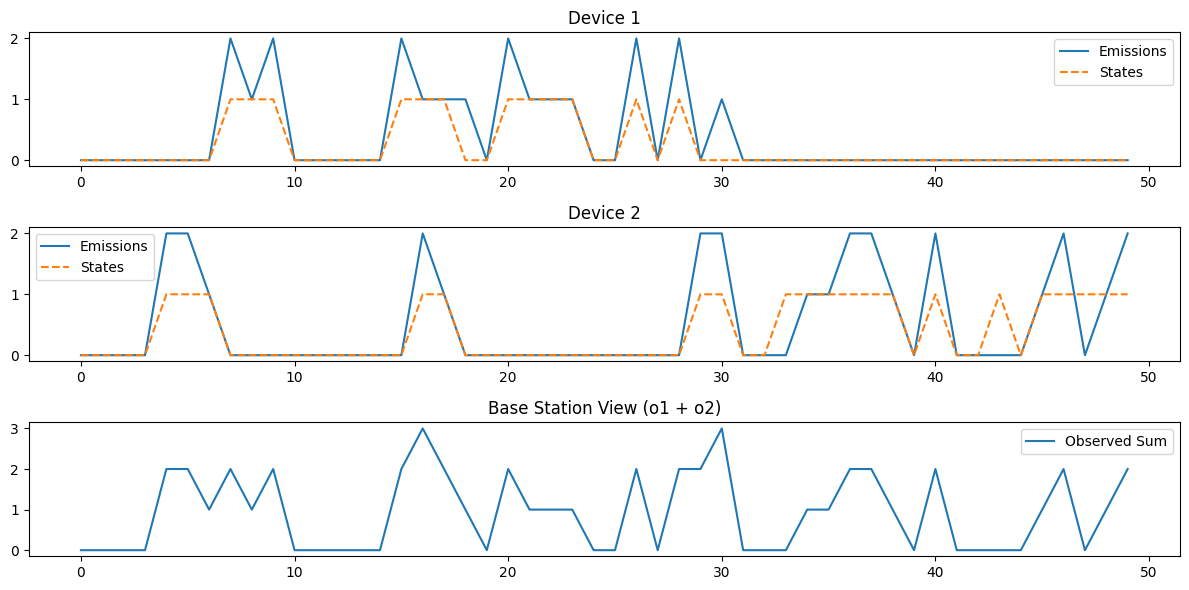

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Device 1")
plt.plot(o1, label='Emissions')
plt.plot(s1, '--', label='States')
plt.legend()

plt.subplot(3, 1, 2)
plt.title("Device 2")
plt.plot(o2, label='Emissions')
plt.plot(s2, '--', label='States')
plt.legend()

plt.subplot(3, 1, 3)
plt.title("Base Station View (o1 + o2)")
plt.plot(combined_obs, label='Observed Sum')
plt.legend()

plt.tight_layout()
plt.show()
